## **Explaoratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the Data**

In [2]:
claim_data = pd.read_csv('processed_claim_data.csv')
claim_data.drop(columns = ['Unnamed: 0'], inplace = True)
claim_data.head()

,Vehicle Make Year,Vehicle Make,Vehicle Model,Claim Reg Date,Accident Place,Operation Assign Date,Portal_OtherAmt,Portal_PartProviderAmt,Portal_WorkShopAmt,Total,TimeDifference,Other_Amt_Class,WorkShop_Amt_Class,Time_Diff_Class,PartProvider_Amt_Class,Total_Class
0,2019,DODGE,CHARGER,2023-08-02,Abha,2023-08-03,366,2000.0,588.0,2954.0,1,Class 2,Class 2,Class 2,Class 2,Class 2
1,2023,Mahindra,Scorpio DC,2023-06-14,Abha,2023-08-22,494,3287.0,738.0,4519.0,69,Class 2,Class 2,Class 3,Class 2,Class 2
2,2022,HYUNDAI,ACCENT,2023-10-03,Abha,2023-10-10,0,10196.0,7000.0,17196.0,7,Class 1,Class 2,Class 2,Class 2,Class 2
3,2021,BUS,CS 75,2023-10-15,Abha,2023-10-16,0,9262.0,1600.0,10862.0,1,Class 1,Class 2,Class 2,Class 2,Class 2
4,2021,MAZDA,CX 9,2023-09-17,Abha,2023-10-17,0,4300.0,4000.0,8300.0,30,Class 1,Class 2,Class 3,Class 2,Class 2


### **1. Basic Statistics**

+ Model Make Year Ranges from 1998 to 2025 in the Data.
+ Other Amount - minimum value is 0, maximum value is 15457, the mean is 143 and standard deviation is 372. Possibly the maximum value is outlier since the mean value is comparatively less, ie, which means Other Amount contain more small values including 0 and there are some extend of outliers.
+ Parts Provider Amount – Minimum value is 0, maximum value is 184,285. The mean is 5781 and standard deviation is 7080 which is higher comparing the Other Amount. This means there is high variability in the values. 25% of values are less than 1582, 50% of values are less than 3863. And extremely high amount also shown in the data.
+ Workshop Amount – minimum value is 0, maximum is 300,000 with mean value of 3023 and standard deviation 4139. There is variations in the data. 25% values are less than 1444, 50% values are less than 2200 and there are extremely high values in the data.
+ Total Claim Amount – minimum value is 100, maximum value is 300,000. The mean is 8939 with standard deviation of 9340. There is high variation in Total Amount. 50% of values are less than 6638 and extremely high values are also there.
+ Time Difference – Column to understand how many days to complete the process of Claim Registration and Operation Dates. Most of the Vehicles are done within one day. Also there are data with high number of days like 1869.869.


In [3]:
claim_data.describe()

,Vehicle Make Year,Portal_OtherAmt,Portal_PartProviderAmt,Portal_WorkShopAmt,Total,TimeDifference
count,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000,17563.000000
mean,2021.337528,134.108353,5781.307213,3023.757253,8939.172820,16.449069
std,2.109586,372.193078,7080.478774,4139.206401,9340.214546,73.535534
min,1998.000000,0.000000,0.000000,0.000000,100.000000,0.000000
25%,2020.000000,0.000000,1582.500000,1444.500000,3632.000000,1.000000
50%,2022.000000,0.000000,3863.000000,2200.000000,6638.000000,1.000000
75%,2023.000000,0.000000,7625.000000,3500.000000,11371.500000,4.000000
max,2025.000000,15457.000000,184285.000000,300000.000000,300000.000000,1869.000000


### **2. Univariate Analysis**

+ Explore Individual Columns to understand the Distribution.
+ From 2020 to 2024 models vehicles are most Claimed Vehicles in Number.
+ By Looking at the Histogram all the values are not normally distributed, every values are skewed to left.
+ So Classifiying the Columns based on the Price.

Other Amount :-

+ Class 1 : value = 0
+ Class 2 : value = (1 - 2000)
+ Class 3 : value > 2000

Workshop Amount :-

+ Class 1 : value = 0
+ Class 2 : value = (1 - 25000)
+ Class 3 : value > 25000

Time Difference :-

+ Class 1 : value = 0
+ Class 2 : value = (1 - 14)
+ Class 3 : value > 14

Parts Provider Amount :-

+ Class 1 : value = 0
+ Class 2 : value = (1 - 25000)
+ Class 3 : value > 25000

Total :-

+ Class 1 : value = 0
+ Class 2 : value = (1 - 50000)
+ Class 3 : value > 50000



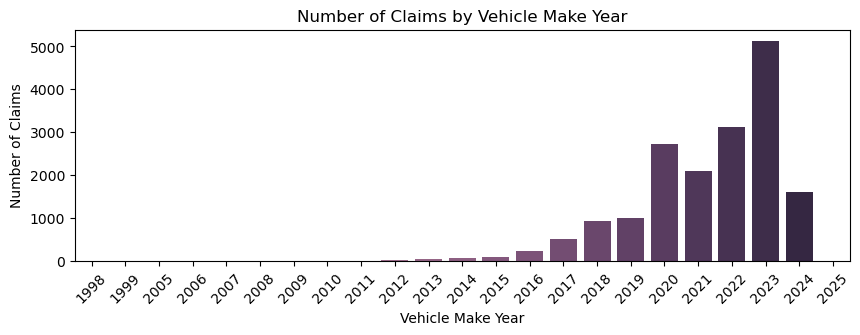

In [4]:
# Plotting the bar chart for Vehicle Make Year
plt.figure(figsize=(10, 3))
sns.countplot(data=claim_data, x='Vehicle Make Year', hue='Vehicle Make Year', dodge=False)
plt.title('Number of Claims by Vehicle Make Year')
plt.xlabel('Vehicle Make Year')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove the legend as it is not needed
plt.show()

In [5]:
print(claim_data['Vehicle Make Year'].value_counts())

Vehicle Make Year
2023    5133
2022    3122
2020    2734
2021    2094
2024    1603
2019    1003
2018     928
2017     496
2016     225
2015      96
2014      71
2013      29
2012       6
2009       4
2006       3
2007       3
2011       3
2010       3
2008       2
2025       2
2005       1
1999       1
1998       1
Name: count, dtype: int64


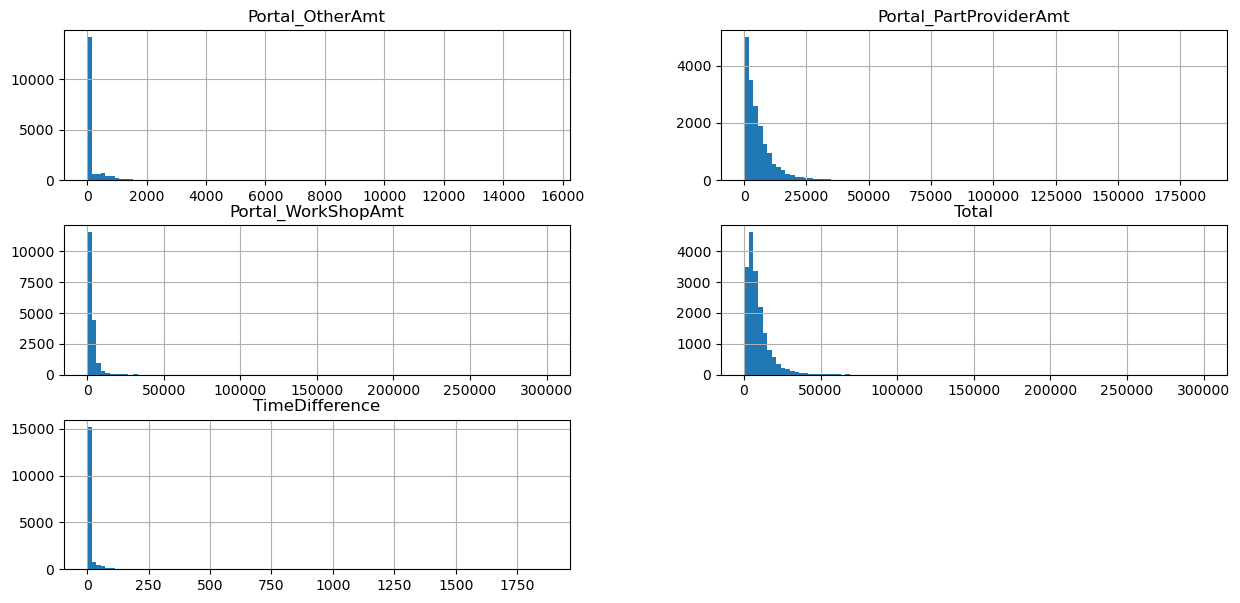

In [6]:
numerical_cols = ['Portal_OtherAmt', 'Portal_PartProviderAmt', 'Portal_WorkShopAmt', 'Total', 'TimeDifference']
claim_data[numerical_cols].hist(bins=100, figsize=(15, 7))
plt.show()

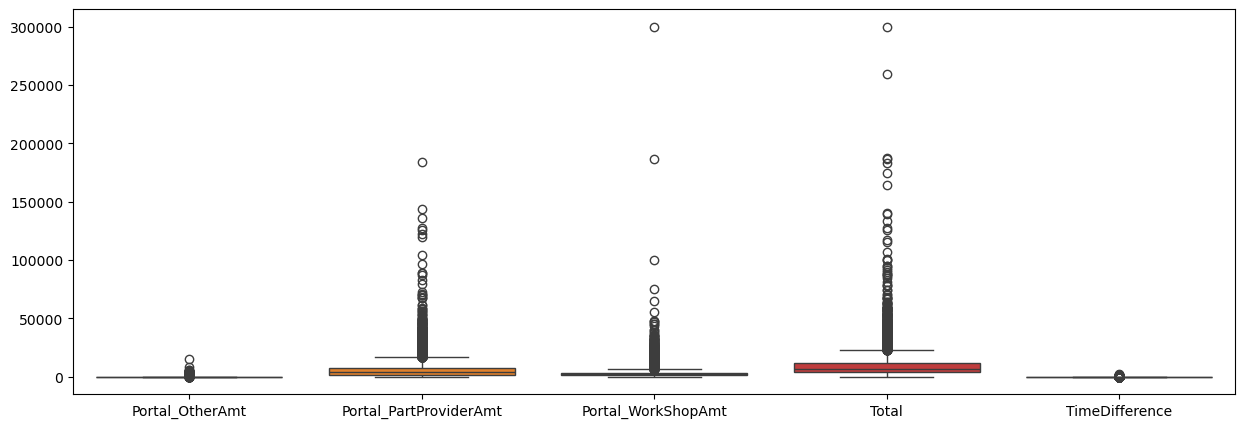

In [7]:
# Boxplot to check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=claim_data[numerical_cols])
plt.show()

In [8]:
# Classifying each column based on the given criteria
def classify_column(value, thresholds):
    if value == 0:
        return 'Class 1'
    elif thresholds[0] <= value <= thresholds[1]:
        return 'Class 2'
    else:
        return 'Class 3'

In [9]:
# Classifying columns based on the specified thresholds
claim_data['Other_Amt_Class'] = claim_data['Portal_OtherAmt'].apply(lambda x: classify_column(x, [1, 2000]))
claim_data['WorkShop_Amt_Class'] = claim_data['Portal_WorkShopAmt'].apply(lambda x: classify_column(x, [1, 25000]))
claim_data['Time_Diff_Class'] = claim_data['TimeDifference'].apply(lambda x: classify_column(x, [1, 14]))
claim_data['PartProvider_Amt_Class'] = claim_data['Portal_PartProviderAmt'].apply(lambda x: classify_column(x, [1, 25000]))
claim_data['Total_Class'] = claim_data['Total'].apply(lambda x: classify_column(x, [1, 50000]))

In [10]:
claim_data.head()

,Vehicle Make Year,Vehicle Make,Vehicle Model,Claim Reg Date,Accident Place,Operation Assign Date,Portal_OtherAmt,Portal_PartProviderAmt,Portal_WorkShopAmt,Total,TimeDifference,Other_Amt_Class,WorkShop_Amt_Class,Time_Diff_Class,PartProvider_Amt_Class,Total_Class
0,2019,DODGE,CHARGER,2023-08-02,Abha,2023-08-03,366,2000.0,588.0,2954.0,1,Class 2,Class 2,Class 2,Class 2,Class 2
1,2023,Mahindra,Scorpio DC,2023-06-14,Abha,2023-08-22,494,3287.0,738.0,4519.0,69,Class 2,Class 2,Class 3,Class 2,Class 2
2,2022,HYUNDAI,ACCENT,2023-10-03,Abha,2023-10-10,0,10196.0,7000.0,17196.0,7,Class 1,Class 2,Class 2,Class 2,Class 2
3,2021,BUS,CS 75,2023-10-15,Abha,2023-10-16,0,9262.0,1600.0,10862.0,1,Class 1,Class 2,Class 2,Class 2,Class 2
4,2021,MAZDA,CX 9,2023-09-17,Abha,2023-10-17,0,4300.0,4000.0,8300.0,30,Class 1,Class 2,Class 3,Class 2,Class 2


C:\Users\Faiz Salam\AppData\Local\Temp\ipykernel_22516\3805077533.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=claim_data, x=column, palette='viridis')
C:\Users\Faiz Salam\AppData\Local\Temp\ipykernel_22516\3805077533.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=claim_data, x=column, palette='viridis')
C:\Users\Faiz Salam\AppData\Local\Temp\ipykernel_22516\3805077533.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=claim_data, x=column, palette='viridis')
C:\Users\Faiz Salam\AppData\Local\Temp\ipykern

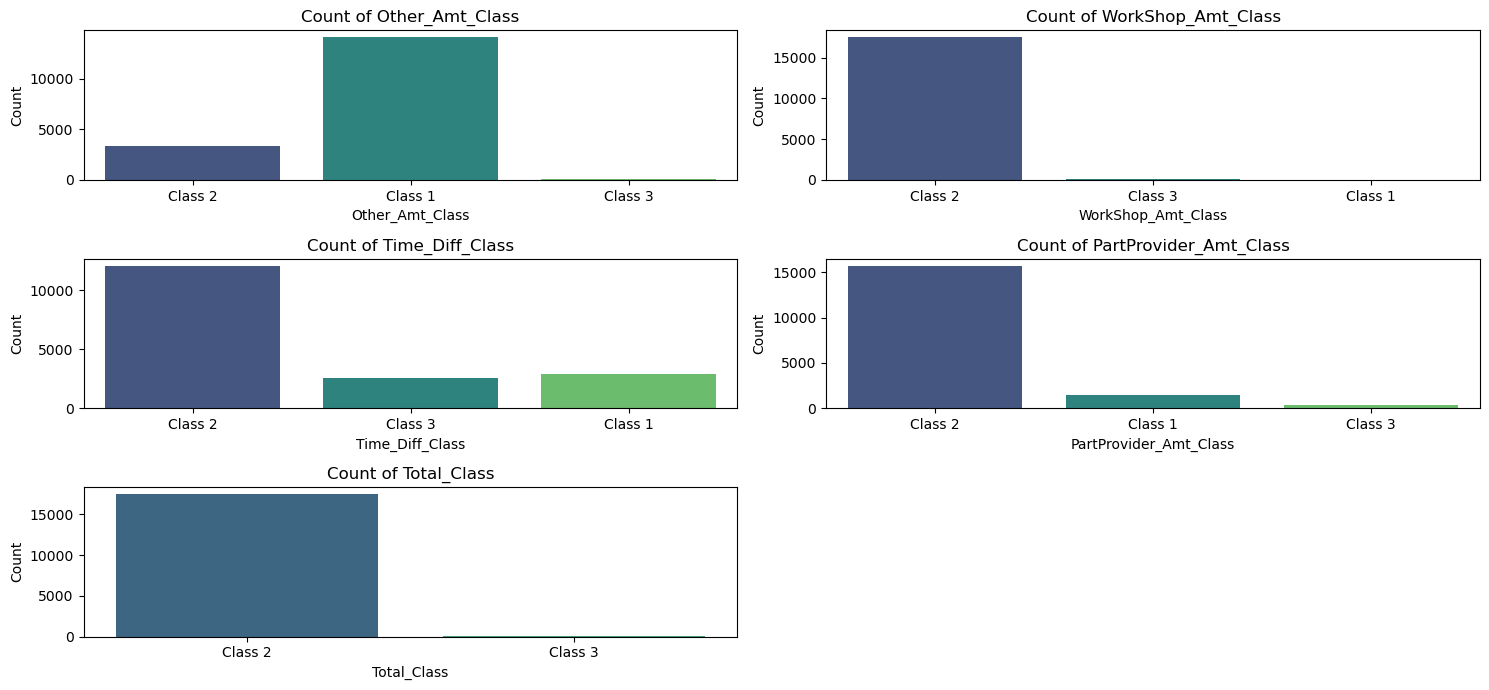

In [20]:
# Setting the size of the plot
plt.figure(figsize=(15, 7))

# Creating a list of columns to plot
columns_to_plot = ['Other_Amt_Class', 'WorkShop_Amt_Class', 'Time_Diff_Class', 'PartProvider_Amt_Class', 'Total_Class']

# Looping through each column and creating a subplot for each
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=claim_data, x=column, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [12]:
claim_data['Other_Amt_Class'].value_counts()

Other_Amt_Class
Class 1    14095
Class 2     3396
Class 3       72
Name: count, dtype: int64

In [13]:
claim_data['WorkShop_Amt_Class'].value_counts()

WorkShop_Amt_Class
Class 2    17490
Class 3       51
Class 1       22
Name: count, dtype: int64

In [14]:
claim_data['Time_Diff_Class'].value_counts()

Time_Diff_Class
Class 2    12055
Class 1     2909
Class 3     2599
Name: count, dtype: int64

In [15]:
claim_data['PartProvider_Amt_Class'].value_counts()

PartProvider_Amt_Class
Class 2    15734
Class 1     1492
Class 3      337
Name: count, dtype: int64

In [16]:
claim_data['Total_Class'].value_counts()

Total_Class
Class 2    17474
Class 3       89
Name: count, dtype: int64

### **3. Bivariate Analysis**

+ Considering Total Claim Amount as a

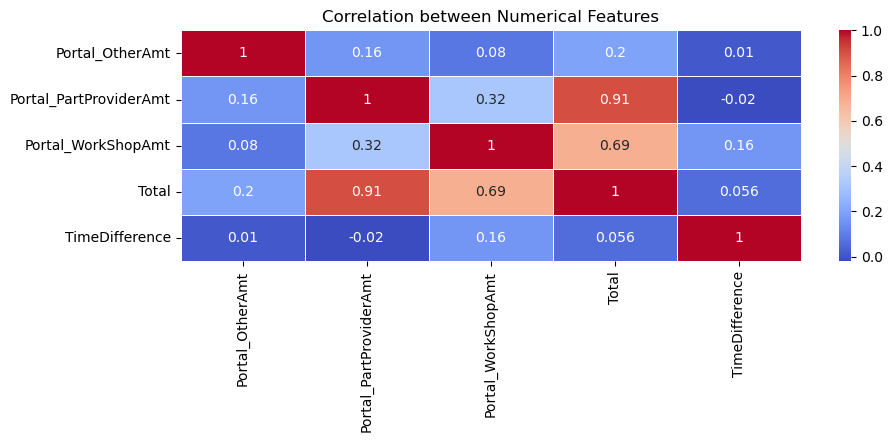

In [27]:
# Correlation heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(claim_data[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Numerical Features')
plt.show()

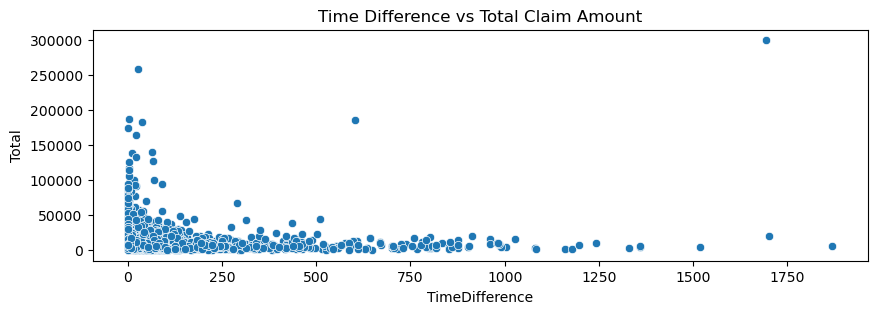

In [29]:
# Scatter plot of 'TimeDifference' vs 'Total'
plt.figure(figsize=(10, 3))
sns.scatterplot(x='TimeDifference', y='Total', data=claim_data)
plt.title('Time Difference vs Total Claim Amount')
plt.show()

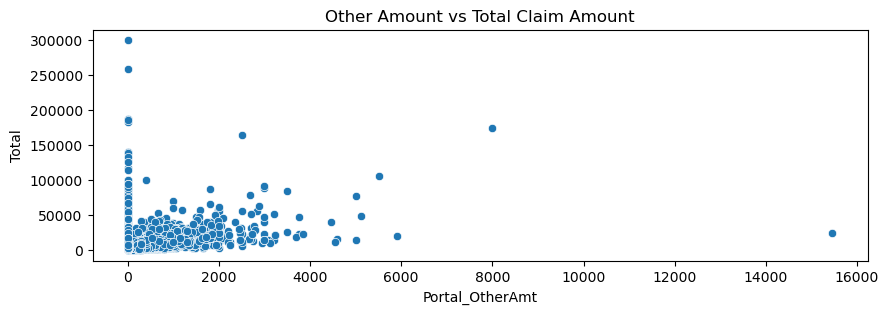

In [34]:
# Scatter plot of 'Portal_OtherAmt' vs 'Total'
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Portal_OtherAmt', y='Total', data=claim_data)
plt.title('Other Amount vs Total Claim Amount')
plt.show()

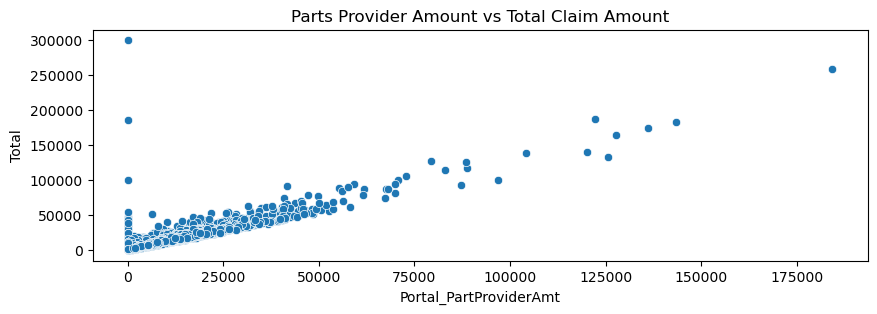

In [35]:
# Scatter plot of 'Portal_PartProviderAmt' vs 'Total'
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Portal_PartProviderAmt', y='Total', data=claim_data)
plt.title('Parts Provider Amount vs Total Claim Amount')
plt.show()

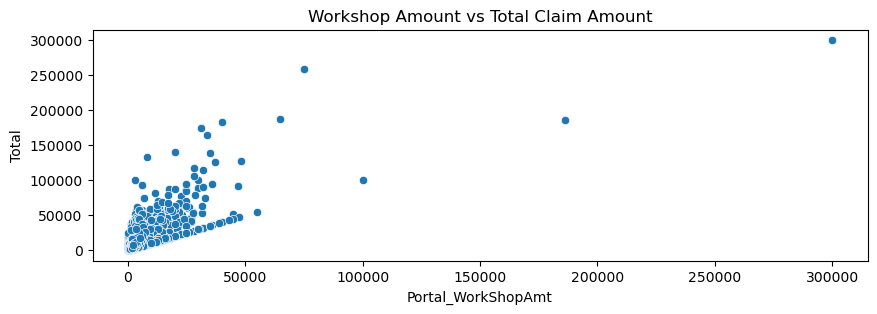

In [36]:
# Scatter plot of 'Portal_WorkShopAmt' vs 'Total'
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Portal_WorkShopAmt', y='Total', data=claim_data)
plt.title('Workshop Amount vs Total Claim Amount')
plt.show()

### **4. Outlier Detection**

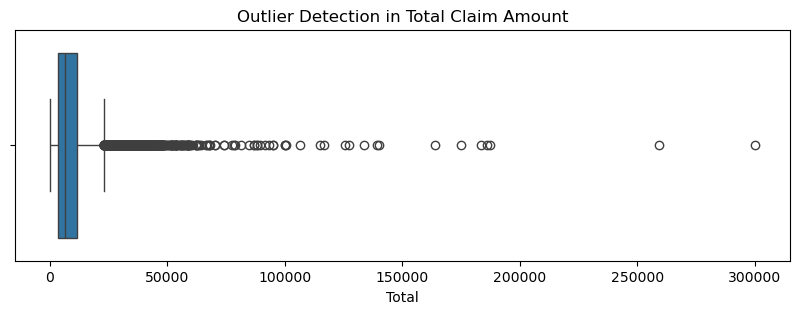

In [40]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=claim_data['Total'])
plt.title('Outlier Detection in Total Claim Amount')
plt.show()

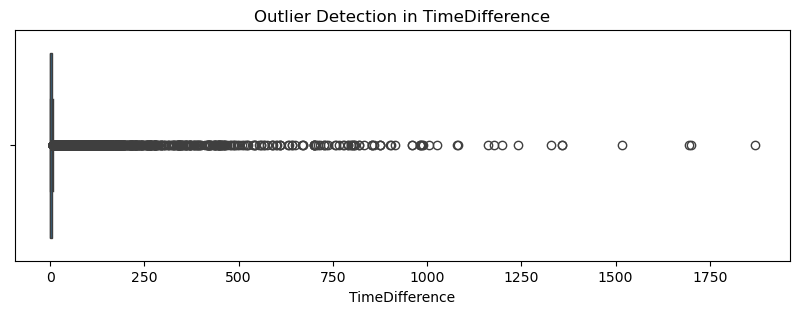

In [41]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=claim_data['TimeDifference'])
plt.title('Outlier Detection in TimeDifference')
plt.show()

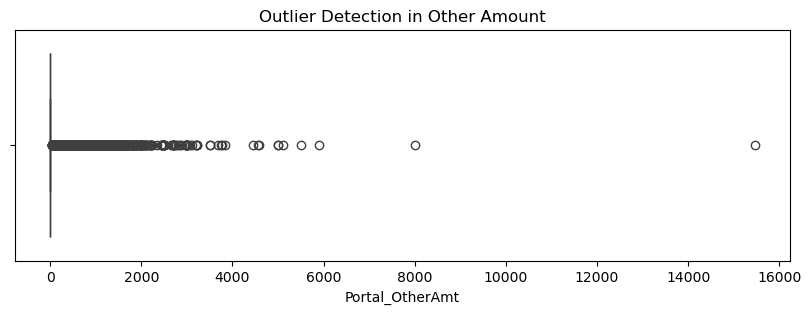

In [42]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=claim_data['Portal_OtherAmt'])
plt.title('Outlier Detection in Other Amount')
plt.show()

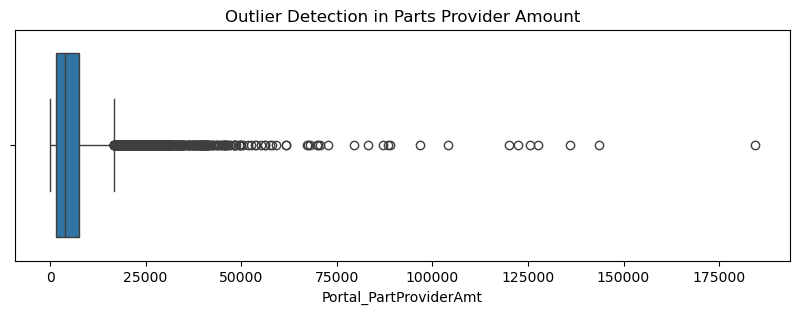

In [43]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=claim_data['Portal_PartProviderAmt'])
plt.title('Outlier Detection in Parts Provider Amount')
plt.show()

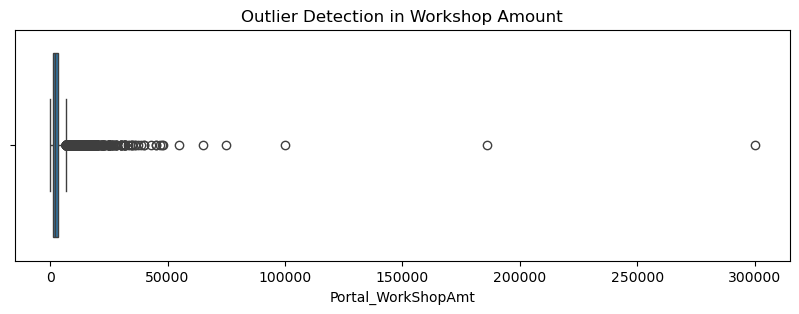

In [44]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=claim_data['Portal_WorkShopAmt'])
plt.title('Outlier Detection in Workshop Amount')
plt.show()

****